In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [67]:
plt.rc('font',size=18)

sns.set(style='whitegrid',color_codes=True)

In [68]:
#Import training file

In [69]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#Exploratory DAta Analysis
#first look of whats in there

In [71]:
data.shape

(891, 12)

In [72]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


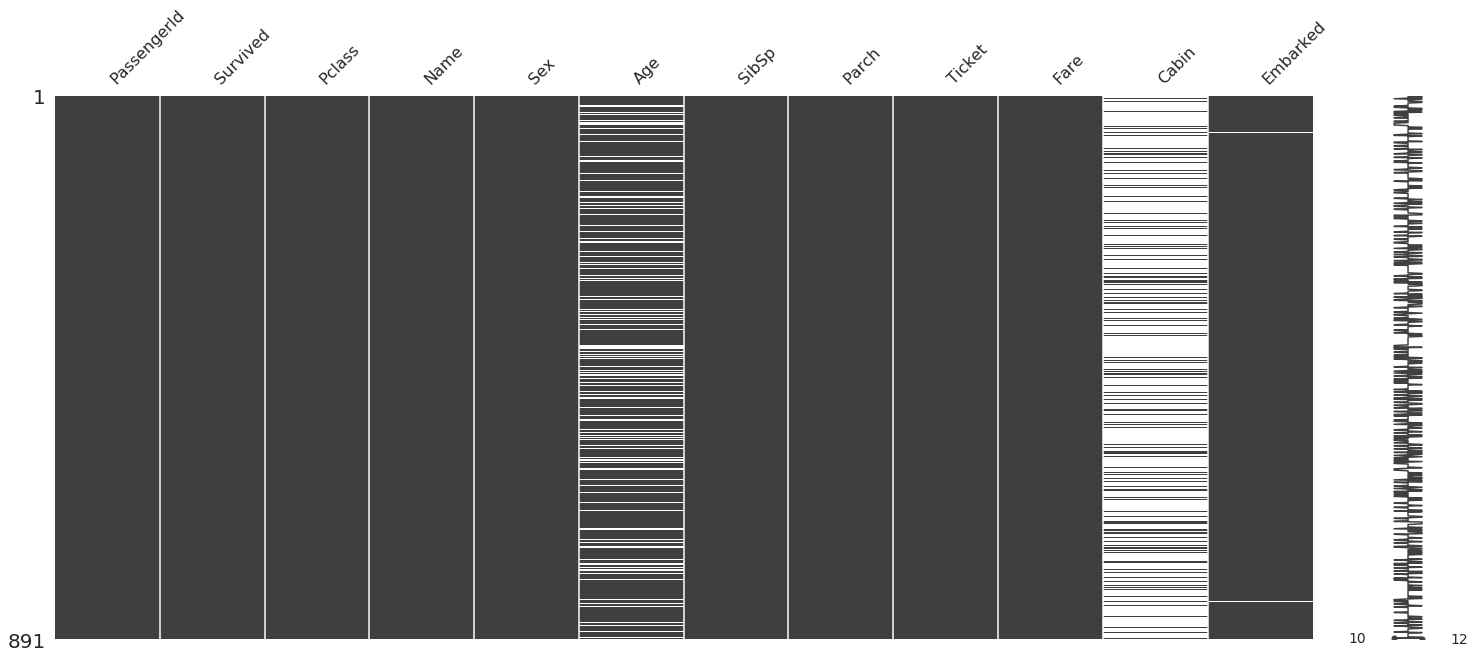

In [74]:
import missingno as msno
msno.matrix(data)

In [75]:
null=pd.DataFrame(data.isnull().sum(),columns=['#null_val'])
null['porc']=(data.isnull().sum()/data.iloc[:,0].count()*100).round(2)
null

,#null_val,porc
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [76]:
data.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


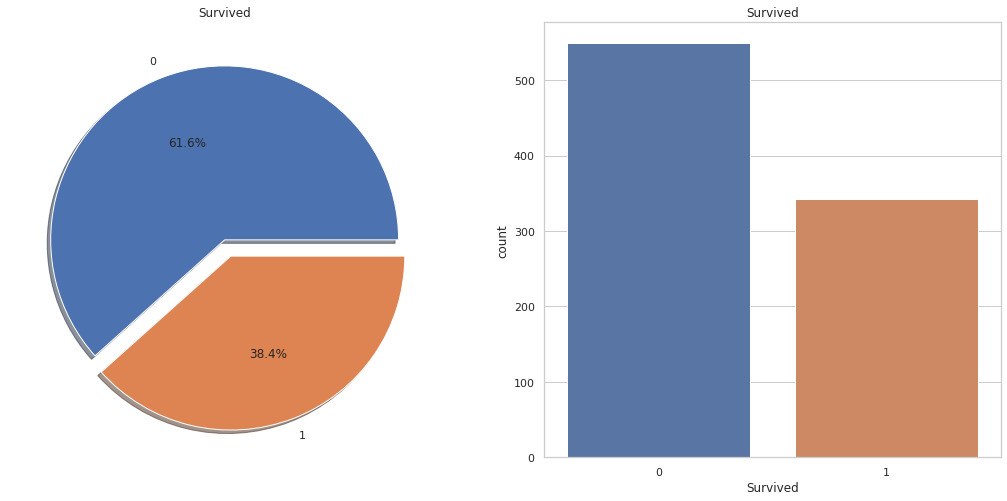

In [77]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

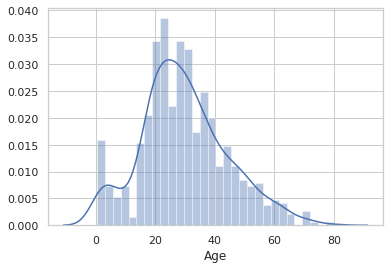

In [78]:
sns.distplot(data['Age'].dropna(),bins=30)

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Female')

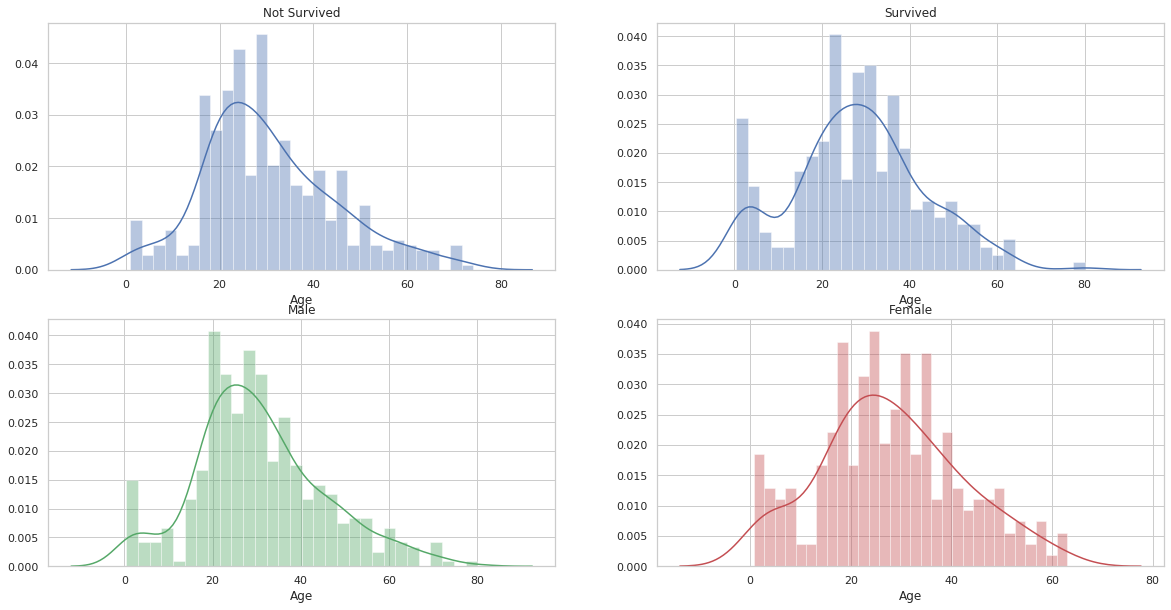

In [79]:
f, ax= plt.subplots(2,2,figsize=(20,10))

sns.distplot(data[data['Survived']==0]['Age'].dropna(),bins=30,ax=ax[0,0])
ax[0,0].set_title('Not Survived')

sns.distplot(data[data['Survived']==1]['Age'].dropna(),bins=30,ax=ax[0,1])
ax[0,1].set_title('Survived')

sns.distplot(data[data['Sex']=='male']['Age'],bins=30,ax=ax[1,0],color='g')
ax[1,0].set_title('Male')

sns.distplot(data[data['Sex']=='female']['Age'],bins=30,ax=ax[1,1],color='r')
ax[1,1].set_title('Female')


In [80]:
data.groupby('Survived').Age.mean().round(1)

Survived
0    30.6
1    28.3
Name: Age, dtype: float64

In [81]:
Sex=pd.DataFrame(data['Sex'].value_counts())
Sex['%']=(Sex['Sex']/Sex['Sex'].sum()).round(2)
Sex

,Sex,%
male,577,0.65
female,314,0.35


In [82]:
pd.crosstab(data.Survived,data.Sex,normalize='index').round(2)

Sex,female,male
Survived,,
0,0.15,0.85
1,0.68,0.32


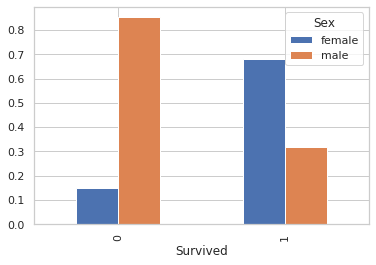

In [83]:
pd.crosstab(data.Survived,data.Sex,normalize='index').plot.bar()

In [84]:
pd.pivot_table(data,values='Age',columns=['Sex'],index=['Survived'],aggfunc=np.mean,margins=True).round(1)

Sex,female,male,All
Survived,,,
0,25.0,31.6,30.6
1,28.8,27.3,28.3
All,27.9,30.7,29.7


Text(0, 0.5, 'Age')

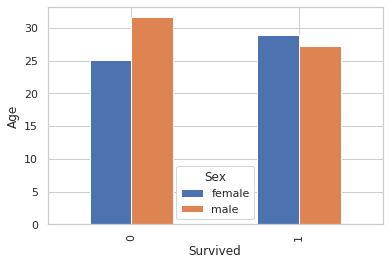

In [85]:
pd.pivot_table(data,values='Age',columns=['Sex'],index=['Survived'],aggfunc=np.mean).plot.bar().set_ylabel('Age')


Text(0.5, 1.0, 'Survived per Class')

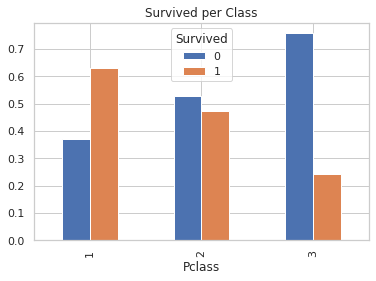

In [86]:
#PClass

pd.crosstab(data.Pclass,data.Survived,normalize='index').plot.bar().set_title('Survived per Class')

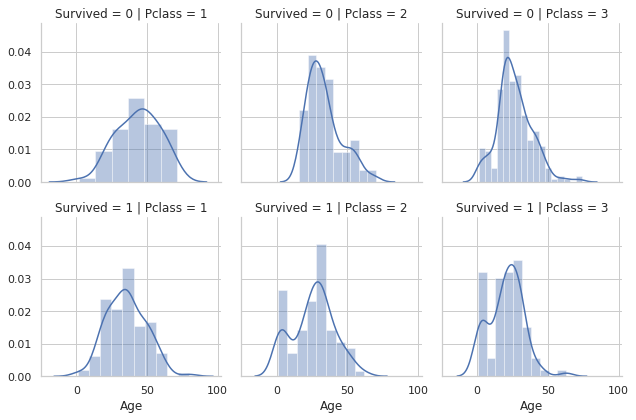

In [87]:
g=sns.FacetGrid(data,row='Survived',col='Pclass')
g.map(sns.distplot,'Age')
plt.show()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


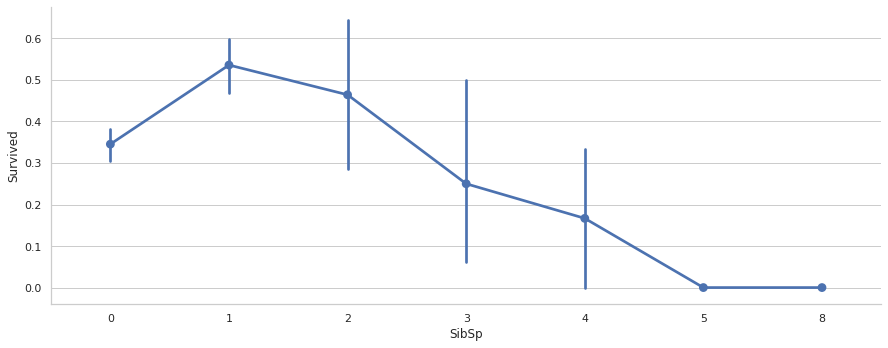

In [88]:
#SibSp & Parch

sns.factorplot('SibSp','Survived',data=data,aspect=2.5)

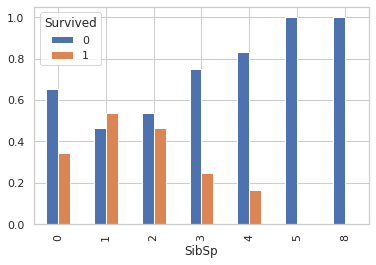

In [89]:
pd.crosstab(data.SibSp,data.Survived,normalize='index').plot.bar()

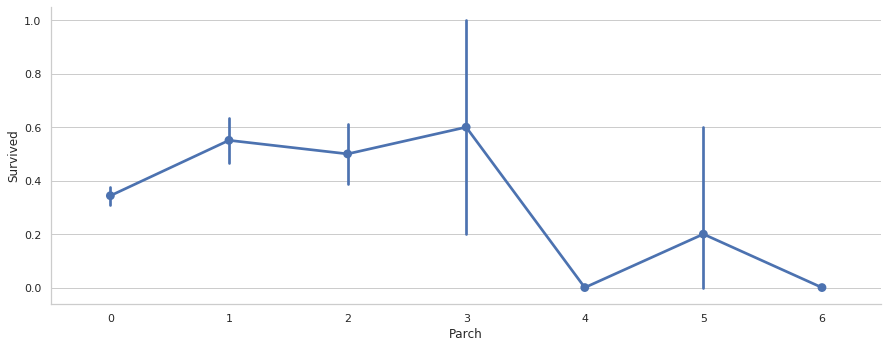

In [90]:
sns.factorplot('Parch','Survived',data=data,aspect=2.5)

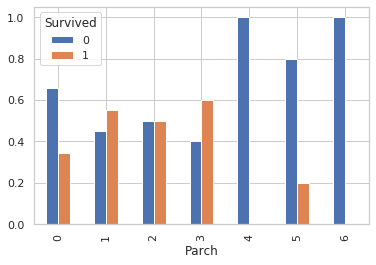

In [91]:
pd.crosstab(data.Parch,data.Survived,normalize='index').plot.bar()

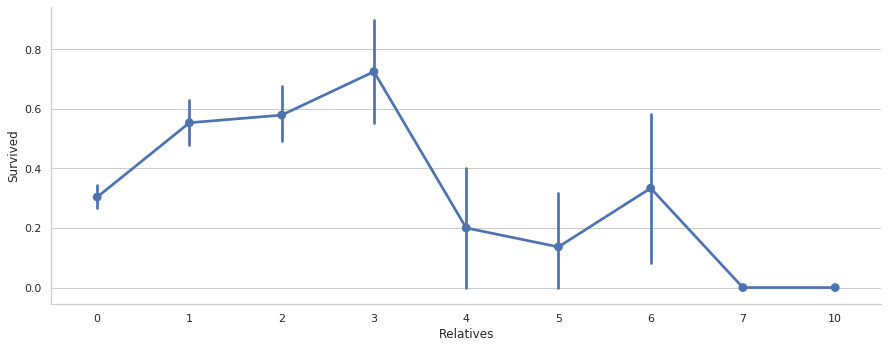

In [92]:
#PROBAR CON LAS DOS JUNTAS!!
#Relatives (SibSp+Parch)

data['Relatives']=data['SibSp']+data['Parch']
sns.factorplot('Relatives','Survived',data=data,aspect=2.5)

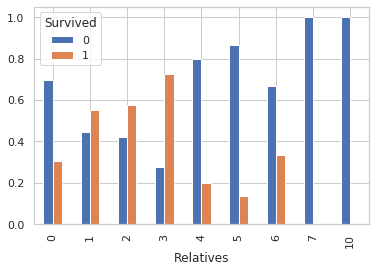

In [93]:
pd.crosstab(data.Relatives,data.Survived,normalize='index').plot.bar()


In [94]:
#como testear colinearidad entre Parch relatives y SibSp??

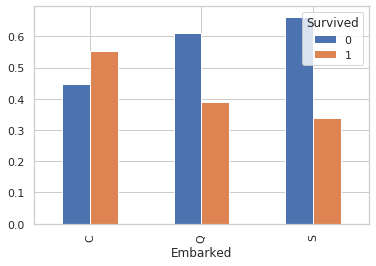

In [95]:
#Embarked
pd.crosstab(data.Embarked,data.Survived,normalize='index').plot.bar()


In [96]:
s=pd.pivot_table(data=data,values='Sex',columns='Embarked',index='Pclass',aggfunc='count',margins=True)
s

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [97]:
(s/s.loc['All',:]*100).round(2)

Embarked,C,Q,S,All
Pclass,,,,
1,50.60,2.60,19.72,24.07
2,10.12,3.90,25.47,20.70
3,39.29,93.51,54.81,55.23
All,100.00,100.00,100.00,100.00


In [98]:
(pd.crosstab(data.Pclass,data.Survived,normalize='index')*100).round(2)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


In [99]:
#Probar nombres! mr,mrs,etc
import re

def get_title(name):
    title_search= re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''

for text in data.Name:
    data['Title']=data['Name'].apply(get_title)
        


In [100]:
pd.crosstab(data.Title, data.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [101]:
data['Title']=data.Title.replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
data['Title']=data.Title.replace('Mlle','Miss')
data['Title']=data.Title.replace('Ms','Miss')
data['Title']=data.Title.replace('Mme','Mrs')

In [102]:
data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

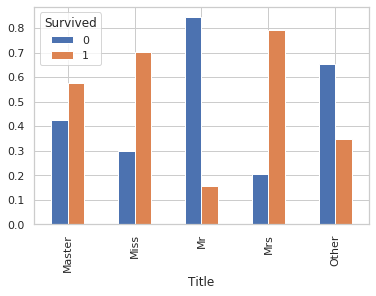

In [103]:
pd.crosstab(data.Title,data.Survived,normalize='index').plot.bar()

# Data Processing

### Missing Values

In [104]:
#Drop cabin (77% missing data)
data=data.drop(['Cabin'],axis=1)
data=data.drop(['SibSp','Parch'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Mr


In [105]:
#Embarked - Mode since there are only 2 missing ()
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [106]:
Emb_mode=data.Embarked.mode()
data['Embarked']=data['Embarked'].fillna(Emb_mode[0])
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
data.Embarked.isna().sum()

0

In [108]:
# Age - Numeric variable, fill null values with random numbers computed based on mean and std

mu=data.Age.mean()
std=data.Age.std()
is_null=data.Age.isnull().sum()

rand_age=np.random.randint(mu-std,mu+std,size=is_null)

rand_age.shape

(177,)

In [109]:
age_slice=data.Age.copy()
age_slice[np.isnan(age_slice)]=rand_age
age_slice.isna().sum()

0

In [110]:
data.Age=age_slice
data.Age=data.Age.astype(int)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Relatives      891 non-null int64
Title          891 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [112]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.563412,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.481872,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


In [113]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,0,Mr


In [114]:
#drop Passanger Id - Name - Ticket
data=data.drop(['PassengerId','Name','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,0,3,male,22,7.2500,S,1,Mr
1,1,1,female,38,71.2833,C,1,Mrs
2,1,3,female,26,7.9250,S,0,Miss
3,1,1,female,35,53.1000,S,1,Mrs
4,0,3,male,35,8.0500,S,0,Mr


# Scaling The Data

In [115]:
#numerical_features=list(data.select_dtypes(include=['int64','float64']))
#numerical_features

In [116]:
#numerical_features.remove('Survived')
#numerical_features.remove('Pclass')

#numerical_features

In [117]:
from sklearn.preprocessing import StandardScaler

#ss_scaler=StandardScaler()
#data[numerical_features]=ss_scaler.fit_transform(data[numerical_features])

In [118]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,0,3,male,22,7.2500,S,1,Mr
1,1,1,female,38,71.2833,C,1,Mrs
2,1,3,female,26,7.9250,S,0,Miss
3,1,1,female,35,53.1000,S,1,Mrs
4,0,3,male,35,8.0500,S,0,Mr


#  One Hot Encoding

In [119]:
encode_list=list(data.select_dtypes(include=['object']).columns)
encode_list

['Sex', 'Embarked', 'Title']

In [120]:
data=pd.get_dummies(data,columns=encode_list,drop_first=True)
data.head()

,Survived,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22,7.2500,1,1,0,1,0,1,0,0
1,1,1,38,71.2833,1,0,0,0,0,0,1,0
2,1,3,26,7.9250,0,0,0,1,1,0,0,0
3,1,1,35,53.1000,1,0,0,1,0,0,1,0
4,0,3,35,8.0500,0,1,0,1,0,1,0,0


# Classifier Comparison

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


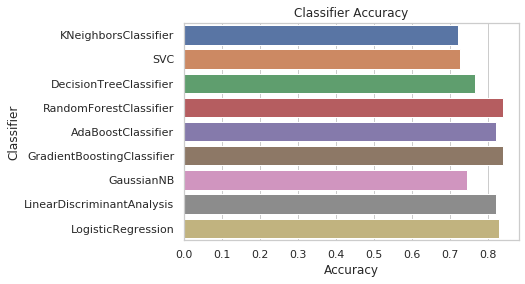

In [122]:
classifiers= [KNeighborsClassifier(3),
            SVC(probability=True),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            LinearDiscriminantAnalysis(),
            LogisticRegression()]

log_cols=['Classifier','Accuracy']
log=pd.DataFrame(columns=log_cols)

#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)


X=data.iloc[:,1:]
y=data.iloc[0::,0]

acc_dict={}

#for train_index, test_index in sss.split(X,y):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]    

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

os= SMOTE(random_state=0)

columns=X_train.columns

os_data_X, os_data_y=os.fit_resample(X_train,y_train)


os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
#os_data_y=pd.DataFrame(data=os_data_y)


for clf in classifiers:
    name=clf.__class__.__name__
    clf.fit(os_data_X,os_data_y)
    train_predictions=clf.predict(X_test)
    acc=accuracy_score(y_test,train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf]=acc_dict[clf]
    log_entry=pd.DataFrame([[clf, acc_dict[clf]]],columns=log_cols)
    log=log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy',y='Classifier',data=log)

In [123]:
log.sort_values(by='Accuracy',ascending=False)

,Classifier,Accuracy
0,RandomForestClassifier,0.837989
0,GradientBoostingClassifier,0.837989
0,LogisticRegression,0.826816
0,AdaBoostClassifier,0.821229
0,LinearDiscriminantAnalysis,0.821229
0,DecisionTreeClassifier,0.765363
0,GaussianNB,0.743017
0,SVC,0.726257
0,KNeighborsClassifier,0.720670


In [124]:
#Random Forest
from sklearn.model_selection import GridSearchCV

forest=RandomForestClassifier()

forest_params=dict(
    max_depth=[n for n in range (9,14)],
    min_samples_split=[n for n in range(4,11)],
    min_samples_leaf=[n for n in range(2,5)],
    n_estimators=[n for n in range(10,60,10)])

forest_cv=GridSearchCV(estimator=forest,param_grid=forest_params,cv=5)

forest_cv.fit(os_data_X,os_data_y)



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [125]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8566103896103895
Optimal params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [126]:
forest_f=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

forest_f.fit(os_data_X,os_data_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
y_pred=forest_f.predict(X_test)

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       117
           1       0.74      0.82      0.78        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



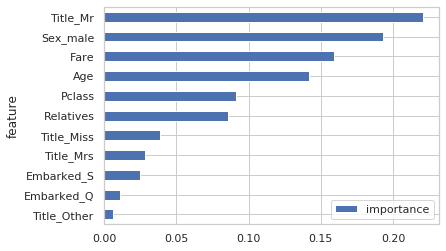

In [136]:
importances=pd.DataFrame({'feature':os_data_X.columns,'importance':forest_f.feature_importances_})
importances.sort_values(by='importance',ascending=True).set_index('feature').plot.barh()

In [141]:
from sklearn.metrics import confusion_matrix

forest_f2=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

forest_f2.fit(os_data_X,os_data_y)

y_train_pred=forest_f2.predict(os_data_X)

confusion_matrix(os_data_y,y_train_pred)

array([[415,  24],
       [ 48, 391]])

In [142]:
print(classification_report(y_train_pred,os_data_y))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       463
           1       0.89      0.94      0.92       415

    accuracy                           0.92       878
   macro avg       0.92      0.92      0.92       878
weighted avg       0.92      0.92      0.92       878



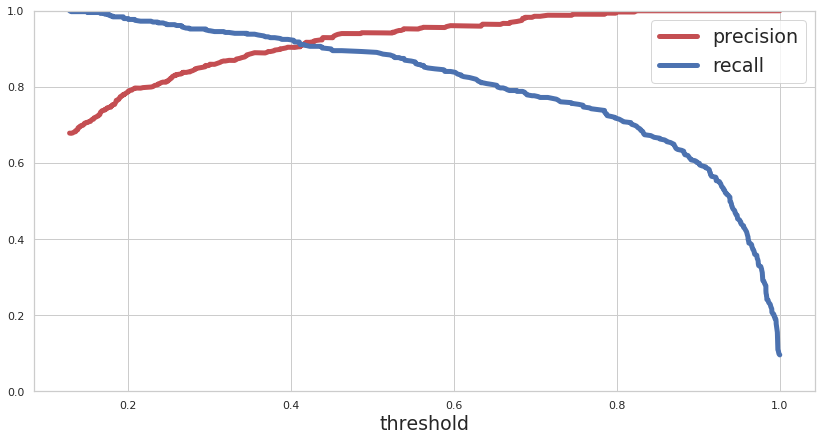

In [144]:
from sklearn.metrics import precision_recall_curve

y_scores = forest_f2.predict_proba(os_data_X)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(os_data_y, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

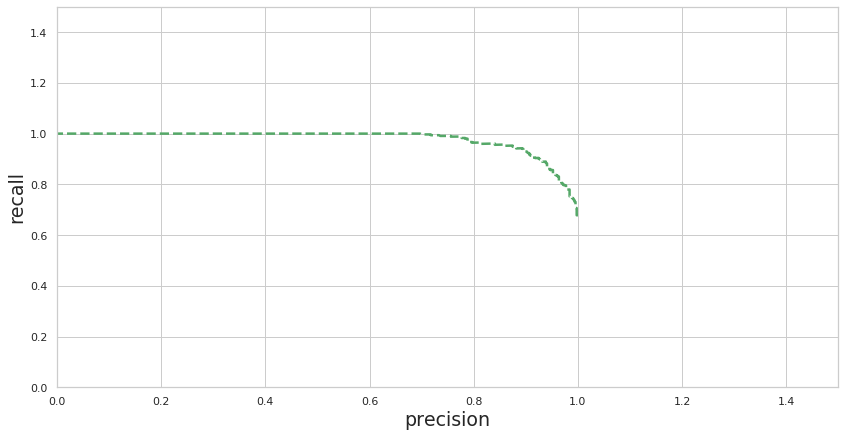

In [145]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

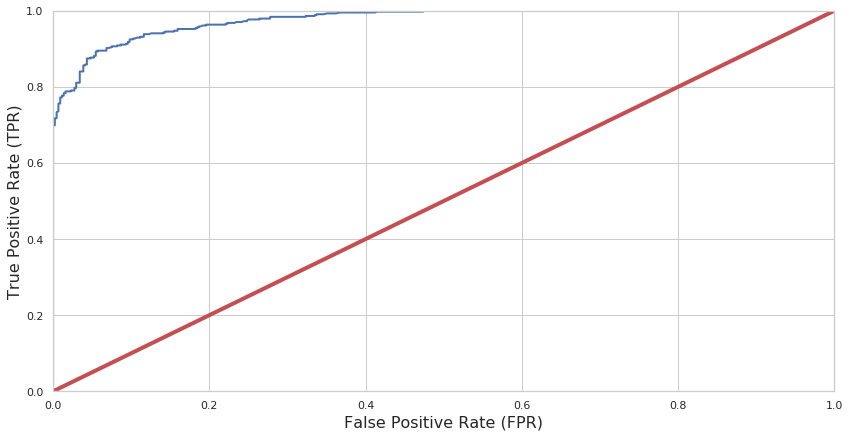

In [146]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(os_data_y, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(os_data_y, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9760197383782774


In [154]:
pred_tresh=forest_f2.predict_proba(os_data_X)
pp=zip(pred_tresh,y_train_pred,y_train)


In [159]:
for item,y,yr in pp:
    if y==yr:
        print(item,y,yr)


# Prepare Test Set

In [64]:
test_data=pd.read_csv('test.csv')

In [65]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
for text in test_data.Name:
    test_data['Title']=test_data['Name'].apply(get_title)
        
pd.crosstab(test_data.Title, test_data.Sex)

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [67]:
test_data['Title']=test_data.Title.replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir','Dona'],'Other')
test_data['Title']=test_data.Title.replace('Mlle','Miss')
test_data['Title']=test_data.Title.replace('Ms','Miss')
test_data['Title']=test_data.Title.replace('Mme','Mrs')

In [68]:
pd.crosstab(test_data.Title, test_data.Sex)

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
Other,1,5


In [69]:
test_data['Relatives']=test_data['SibSp']+test_data['Parch']
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [70]:
test_data=test_data.drop(['Cabin','SibSp','Parch'],axis=1)

In [71]:
Emb_test_mode=test_data.Embarked.mode()
test_data['Embarked']=test_data['Embarked'].fillna(Emb_test_mode[0])
test_data.Embarked.isna().sum()

0

In [72]:
Fare_test_mode=test_data.Fare.mode()
test_data['Fare']=test_data['Fare'].fillna(Fare_test_mode[0])
test_data.Fare.isna().sum()

0

In [73]:
mu_t=test_data.Age.mean()
std_t=test_data.Age.std()
is_null_t=test_data.Age.isnull().sum()

rand_age_t=np.random.randint(mu_t-std_t,mu_t+std_t,size=is_null_t)

rand_age_t.shape

(86,)

In [74]:
age_slice_t=test_data.Age.copy()
age_slice_t[np.isnan(age_slice_t)]=rand_age_t
age_slice_t.isna().sum()

0

In [75]:
test_data.Age=age_slice_t
test_data.Age=test_data.Age.astype(int)

In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
Relatives      418 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


In [77]:
Pass_id=test_data.PassengerId
test_data=test_data.drop(['PassengerId','Name','Ticket'],axis=1)


In [78]:
#ss_scaler=StandardScaler()
#test_data[numerical_features]=ss_scaler.fit_transform(test_data[numerical_features])

In [79]:
test_data=pd.get_dummies(test_data,columns=encode_list,drop_first=True)
test_data.head()

,Pclass,Age,Fare,Relatives,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34,7.8292,0,1,1,0,0,1,0,0
1,3,47,7.0000,1,0,0,1,0,0,1,0
2,2,62,9.6875,0,1,1,0,0,1,0,0
3,3,27,8.6625,0,1,0,1,0,1,0,0
4,3,22,12.2875,2,0,0,1,0,0,1,0


In [80]:
test_data.isna().sum()

Pclass         0
Age            0
Fare           0
Relatives      0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Other    0
dtype: int64

In [81]:
final_prediction=forest_f.predict(test_data)

In [82]:
final_prediction.shape

(418,)

In [83]:
Pass_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [84]:
final_pred=pd.concat([Pass_id,pd.Series(final_prediction)],axis=1)
final_pred.columns=['PassengerId','Survived']
final_pred=final_pred.set_index('PassengerId')

final_pred

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [85]:
final_pred.to_csv('final_pred4.csv')